In [2]:
# Import necessary libraries
import os
import torch
import torchvision
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from PIL import Image

In [2]:
# Register your dataset
register_coco_instances("colonies_dataset_train", {}, "annotations.json", "")
register_coco_instances("colonies_dataset_test", {}, "annotations.json", "")

In [3]:
# Get dataset metadata
my_dataset_metadata = MetadataCatalog.get("colonies_dataset")

In [18]:
# Configuration
if __name__ == '__main__':
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
    cfg.DATASETS.TRAIN = ("colonies_dataset_train",)
    cfg.DATASETS.TEST = ("colonies_dataset_test",)  # no metrics implemented for this dataset
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 10
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 24
    cfg.MODEL.DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    # Trainer
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    trainer = DefaultTrainer(cfg) 
    trainer.resume_or_load(resume=False)
    
    # Training
    trainer.train()

[03/22 01:56:56 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (25, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (25,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (96, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (96,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias

[03/22 01:56:57 d2.engine.train_loop]: Starting training from iteration 0
[03/22 01:59:32 d2.utils.events]:  eta: 0:10:09  iter: 19  total_loss: 6.951  loss_cls: 3.111  loss_box_reg: 0.403  loss_rpn_cls: 3.093  loss_rpn_loc: 0.3423    time: 7.5788  last_time: 7.3699  data_time: 0.2641  last_data_time: 0.0014   lr: 4.7703e-05  
[03/22 02:02:03 d2.utils.events]:  eta: 0:07:36  iter: 39  total_loss: 3.284  loss_cls: 2.423  loss_box_reg: 0.4679  loss_rpn_cls: 0.199  loss_rpn_loc: 0.2527    time: 7.5545  last_time: 7.5430  data_time: 0.0023  last_data_time: 0.0016   lr: 9.7653e-05  
[03/22 02:04:33 d2.utils.events]:  eta: 0:05:04  iter: 59  total_loss: 2.185  loss_cls: 1.23  loss_box_reg: 0.5088  loss_rpn_cls: 0.1184  loss_rpn_loc: 0.2701    time: 7.5277  last_time: 6.9235  data_time: 0.0018  last_data_time: 0.0029   lr: 0.0001476  
[03/22 02:07:05 d2.utils.events]:  eta: 0:02:33  iter: 79  total_loss: 1.994  loss_cls: 1.086  loss_box_reg: 0.5064  loss_rpn_cls: 0.1004  loss_rpn_loc: 0.2288 

In [19]:
from detectron2.engine import DefaultPredictor
# Create a predictor
predictor = DefaultPredictor(cfg)

[03/22 02:13:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (25, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (25,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (96, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (96,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias

In [27]:
# Load an image
image_path = "sp05_img06.jpg"
image = Image.open(image_path)

In [28]:
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2840x2852 at 0x196870726D0>


In [29]:
import numpy as np
# Make predictions
outputs = predictor(np.array(image))

In [30]:
# Visualize the predictions
v = Visualizer(image, metadata=my_dataset_metadata, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
image_with_predictions = out.get_image()

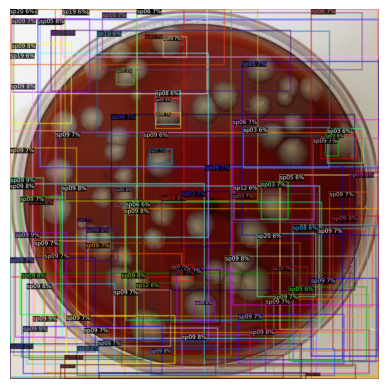

In [31]:
# Display the image with predictions
import matplotlib.pyplot as plt
# Display the image with predictions
plt.imshow(image_with_predictions)
plt.axis('off')
plt.show()

In [32]:
# Export the image with predictions
plt.imsave("image_with_predictions.jpg", image_with_predictions)